# Data Exploration

Goal: To understand:
- Data structure and format
- Geographic coverage
- Time series characteristics
- Data quality and missing values
- Price trends and patterns
- Potential challenges for modeling


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
import os

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully!")

Libraries imported successfully!


## Data Loading and Initial Inspection

In [2]:
# Load the ZHVI data
data_path = '../data/raw/zhvi_zip.csv'

print(f"Loading data from: {data_path}")
print(f"File size: {os.path.getsize(data_path) / (1024*1024):.1f} MB")

# Load data
df = pd.read_csv(data_path)

print(f"\nData loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / (1024*1024):.1f} MB")

Loading data from: ../data/raw/zhvi_zip.csv
File size: 110.5 MB

Data loaded successfully!
Shape: (26316, 313)
Memory usage: 71.3 MB


In [5]:
# Basic data info
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]:,}")
print(f"\nFirst few column names:")
print(df.columns[:10].tolist())
print(f"\nLast few column names:")
print(df.columns[-10:].tolist())

Rows: 26,316
Columns: 313

First few column names:
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName', '2000-01-31']

Last few column names:
['2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30']


In [6]:
# Display first few rows
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,215066.97,215253.63,215752.40,216759.82,216795.86,216638.56,215861.85,215895.31,215659.86,216042.93,216925.36,218115.01,218845.86,218544.87,217818.80,217040.35,217733.32,219024.03,220228.34,220827.43,220736.63,220755.81,220435.96,219675.38,219018.68,218562.50,218978.50,219566.38,220522.08,221366.55,221548.85,221221.31,220215.38,219540.87,218791.78,219132.79,220112.65,221418.25,222295.71,222770.19,223080.16,223609.44,224169.19,224875.70,225024.59,225294.73,225364.45,225911.59,226773.01,

In [7]:
# Data types and basic info
print("=== DATA TYPES ===")
df.info()

=== DATA TYPES ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26316 entries, 0 to 26315
Columns: 313 entries, RegionID to 2025-04-30
dtypes: float64(304), int64(3), object(6)
memory usage: 62.8+ MB


## Understanding Data Structure

In [8]:
# Identify metadata columns vs time series columns
metadata_cols = []
date_cols = []

for col in df.columns:
    # Check if column name looks like a date (YYYY-MM-DD format)
    try:
        pd.to_datetime(col)
        date_cols.append(col)
    except:
        metadata_cols.append(col)

print(f"Metadata columns ({len(metadata_cols)}): {metadata_cols}")
print(f"\nDate columns ({len(date_cols)}): {len(date_cols)} columns")
print(f"Date range: {date_cols[0]} to {date_cols[-1]}")

# Convert date columns to datetime for analysis
date_range = pd.to_datetime(date_cols)
print(f"\nTime series span: {date_range.min()} to {date_range.max()}")
print(f"Total months: {len(date_cols)}")
print(f"Years covered: {date_range.max().year - date_range.min().year + 1}")

Metadata columns (9): ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']

Date columns (304): 304 columns
Date range: 2000-01-31 to 2025-04-30

Time series span: 2000-01-31 00:00:00 to 2025-04-30 00:00:00
Total months: 304
Years covered: 26


In [9]:
# Examine metadata columns
print("=== METADATA ANALYSIS ===")
for col in metadata_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Missing values: {df[col].isnull().sum()}")
    if df[col].nunique() < 20:
        print(f"  Values: {df[col].unique()[:10]}")
    else:
        print(f"  Sample values: {df[col].dropna().unique()[:5]}")

=== METADATA ANALYSIS ===

RegionID:
  Unique values: 26316
  Missing values: 0
  Sample values: [91982 61148 91940 62080 91733]

SizeRank:
  Unique values: 15392
  Missing values: 0
  Sample values: [1 2 3 4 5]

RegionName:
  Unique values: 26316
  Missing values: 0
  Sample values: [77494  8701 77449 11368 77084]

RegionType:
  Unique values: 1
  Missing values: 0
  Values: ['zip']

StateName:
  Unique values: 51
  Missing values: 0
  Sample values: ['TX' 'NJ' 'NY' 'CA' 'IL']

State:
  Unique values: 51
  Missing values: 0
  Sample values: ['TX' 'NJ' 'NY' 'CA' 'IL']

City:
  Unique values: 12721
  Missing values: 1043
  Sample values: ['Katy' 'Lakewood' 'New York' 'Houston' 'El Paso']

Metro:
  Unique values: 927
  Missing values: 4732
  Sample values: ['Houston-The Woodlands-Sugar Land, TX'
 'New York-Newark-Jersey City, NY-NJ-PA' 'El Paso, TX'
 'Austin-Round Rock-Georgetown, TX' 'Los Angeles-Long Beach-Anaheim, CA']

CountyName:
  Unique values: 1822
  Missing values: 0
  Sample va

## Geographic Coverage Analysis

In [10]:
# Geographic distribution
print("=== GEOGRAPHIC COVERAGE ===")

if 'State' in df.columns:
    print(f"\nStates covered: {df['State'].nunique()}")
    state_counts = df['State'].value_counts()
    print(f"\nTop 10 states by ZIP code count:")
    print(state_counts.head(10))

if 'City' in df.columns:
    print(f"\nCities covered: {df['City'].nunique()}")
    city_counts = df['City'].value_counts()
    print(f"\nTop 10 cities by ZIP code count:")
    print(city_counts.head(10))

if 'RegionName' in df.columns:
    print(f"\nTotal ZIP codes: {df['RegionName'].nunique()}")
    print(f"ZIP code range: {df['RegionName'].min()} to {df['RegionName'].max()}")

=== GEOGRAPHIC COVERAGE ===

States covered: 51

Top 10 states by ZIP code count:
State
NY    1561
CA    1543
TX    1514
PA    1364
IL    1084
OH    1024
FL     924
MI     892
IA     825
MO     764
Name: count, dtype: int64

Cities covered: 12721

Top 10 cities by ZIP code count:
City
New York        172
Houston         105
Los Angeles      97
San Antonio      57
Chicago          56
Philadelphia     50
Dallas           49
Springfield      48
Kansas City      48
Phoenix          46
Name: count, dtype: int64

Total ZIP codes: 26316
ZIP code range: 1001 to 99929


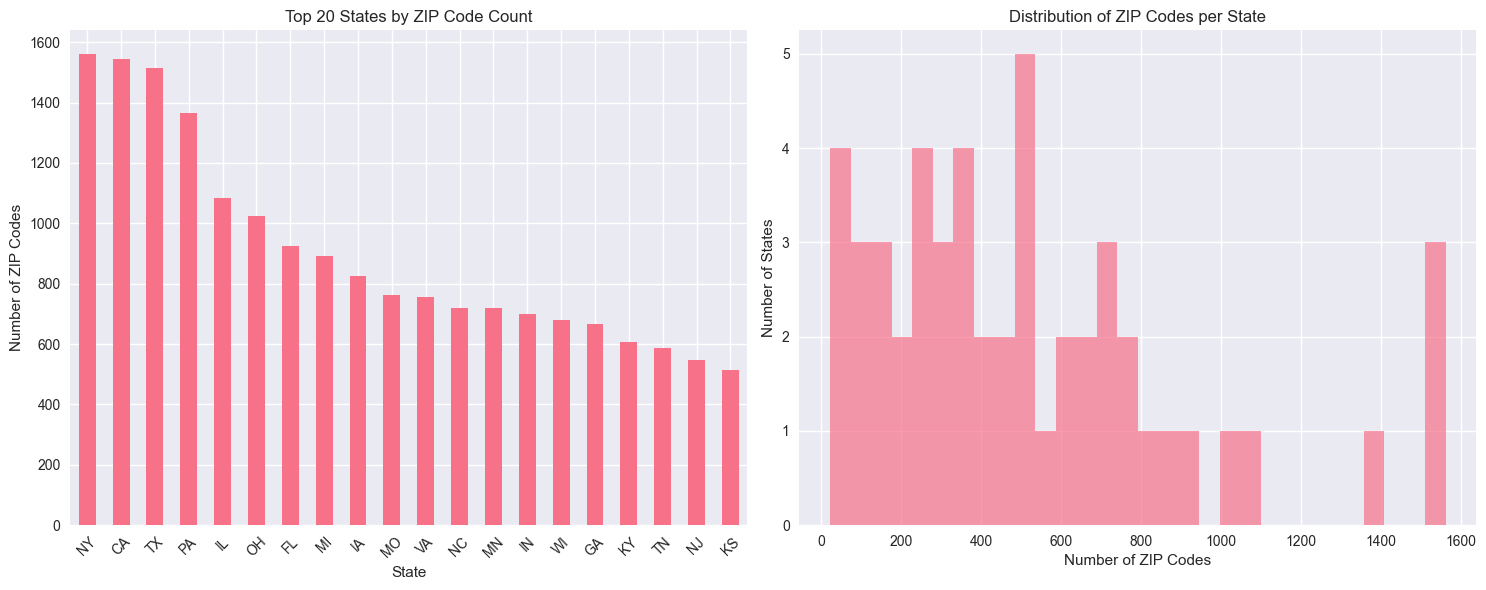

In [11]:
# Visualize geographic distribution
if 'State' in df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # State distribution
    state_counts = df['State'].value_counts().head(20)
    state_counts.plot(kind='bar', ax=ax1)
    ax1.set_title('Top 20 States by ZIP Code Count')
    ax1.set_xlabel('State')
    ax1.set_ylabel('Number of ZIP Codes')
    ax1.tick_params(axis='x', rotation=45)
    
    # Distribution of ZIP codes per state
    ax2.hist(df['State'].value_counts(), bins=30, alpha=0.7)
    ax2.set_title('Distribution of ZIP Codes per State')
    ax2.set_xlabel('Number of ZIP Codes')
    ax2.set_ylabel('Number of States')
    
    plt.tight_layout()
    plt.show()

## Data Quality Assessment

In [12]:
# Missing data analysis
print("=== MISSING DATA ANALYSIS ===")

# Calculate missing data for time series columns
missing_data = df[date_cols].isnull().sum()
missing_pct = (missing_data / len(df)) * 100

print(f"\nMissing data statistics for time series:")
print(f"Total data points: {len(df) * len(date_cols):,}")
print(f"Missing data points: {missing_data.sum():,}")
print(f"Overall missing percentage: {(missing_data.sum() / (len(df) * len(date_cols))) * 100:.2f}%")

# Missing data by time period
print(f"\nMissing data by time period:")
print(f"Periods with most missing data:")
print(missing_data.sort_values(ascending=False).head(10))

=== MISSING DATA ANALYSIS ===

Missing data statistics for time series:
Total data points: 8,000,064
Missing data points: 1,933,843
Overall missing percentage: 24.17%

Missing data by time period:
Periods with most missing data:
2000-01-31    13422
2000-02-29    13356
2000-03-31    13342
2000-04-30    13323
2000-05-31    13260
2000-06-30    13249
2000-07-31    13233
2000-08-31    13208
2000-09-30    13193
2000-10-31    13180
dtype: int64


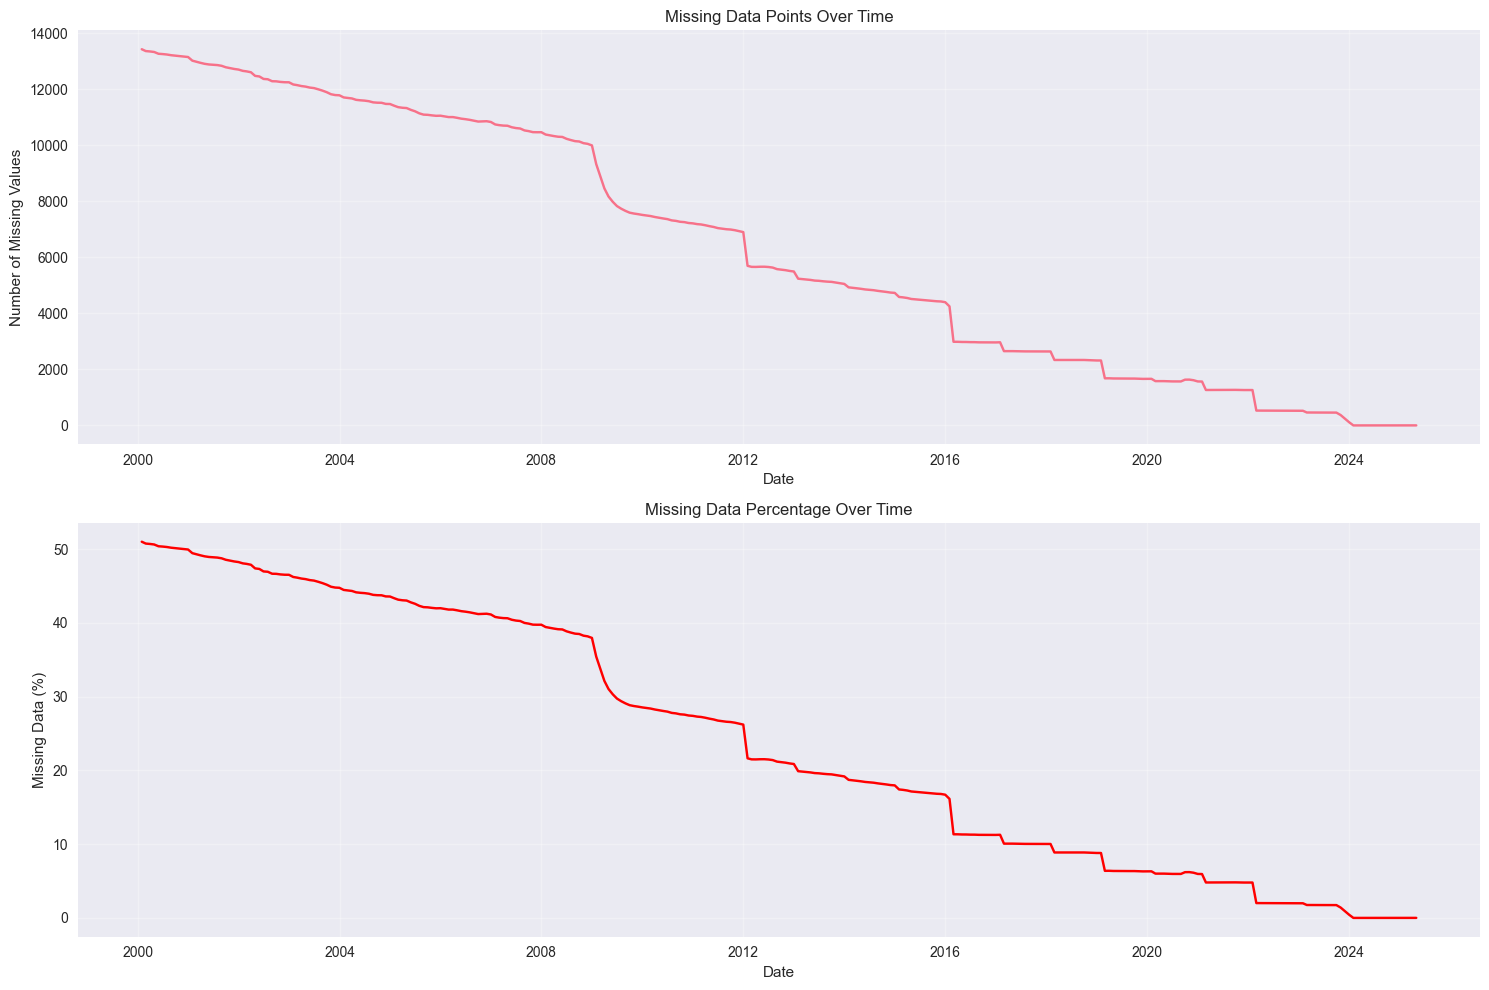

In [13]:
# Visualize missing data patterns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Missing data over time
missing_by_date = df[date_cols].isnull().sum()
dates = pd.to_datetime(missing_by_date.index)
ax1.plot(dates, missing_by_date.values)
ax1.set_title('Missing Data Points Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Missing Values')
ax1.grid(True, alpha=0.3)

# Missing data percentage over time
missing_pct_by_date = (missing_by_date / len(df)) * 100
ax2.plot(dates, missing_pct_by_date.values, color='red')
ax2.set_title('Missing Data Percentage Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Missing Data (%)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== DATA COMPLETENESS BY ZIP CODE ===

Data completeness statistics:
Mean completeness: 75.83%
Median completeness: 96.38%
Min completeness: 5.26%
Max completeness: 100.00%


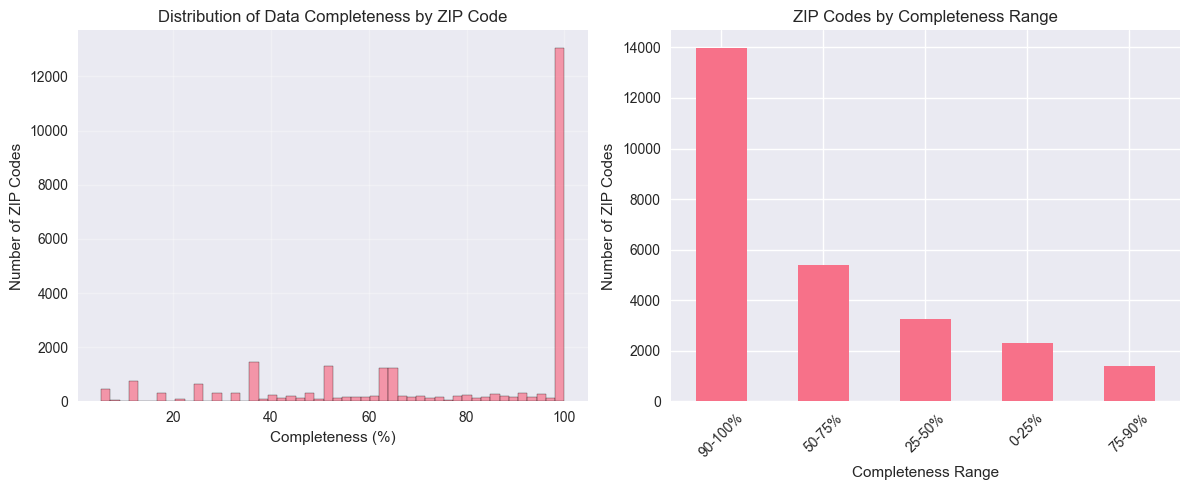


ZIP codes with >80% data coverage: 14,977 (56.9%)


In [14]:
# Data completeness by ZIP code
print("=== DATA COMPLETENESS BY ZIP CODE ===")

# Calculate completeness for each ZIP code
completeness = df[date_cols].notna().sum(axis=1)
completeness_pct = (completeness / len(date_cols)) * 100

print(f"\nData completeness statistics:")
print(f"Mean completeness: {completeness_pct.mean():.2f}%")
print(f"Median completeness: {completeness_pct.median():.2f}%")
print(f"Min completeness: {completeness_pct.min():.2f}%")
print(f"Max completeness: {completeness_pct.max():.2f}%")

# Distribution of completeness
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(completeness_pct, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Data Completeness by ZIP Code')
plt.xlabel('Completeness (%)')
plt.ylabel('Number of ZIP Codes')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
completeness_ranges = pd.cut(completeness_pct, bins=[0, 25, 50, 75, 90, 100], labels=['0-25%', '25-50%', '50-75%', '75-90%', '90-100%'])
completeness_ranges.value_counts().plot(kind='bar')
plt.title('ZIP Codes by Completeness Range')
plt.xlabel('Completeness Range')
plt.ylabel('Number of ZIP Codes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ZIP codes with good data coverage (>80% complete)
good_coverage = completeness_pct >= 80
print(f"\nZIP codes with >80% data coverage: {good_coverage.sum():,} ({(good_coverage.sum()/len(df))*100:.1f}%)")

## Price Distribution and Statistics

In [15]:
# Overall price statistics
print("=== PRICE STATISTICS ===")

# Get all price values (excluding NaN)
all_prices = df[date_cols].values.flatten()
all_prices = all_prices[~np.isnan(all_prices)]

print(f"\nOverall price statistics:")
print(f"Total price observations: {len(all_prices):,}")
print(f"Mean price: ${np.mean(all_prices):,.0f}")
print(f"Median price: ${np.median(all_prices):,.0f}")
print(f"Standard deviation: ${np.std(all_prices):,.0f}")
print(f"Min price: ${np.min(all_prices):,.0f}")
print(f"Max price: ${np.max(all_prices):,.0f}")

# Percentiles
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
print(f"\nPrice percentiles:")
for p in percentiles:
    value = np.percentile(all_prices, p)
    print(f"  {p}th percentile: ${value:,.0f}")

=== PRICE STATISTICS ===

Overall price statistics:
Total price observations: 6,066,221
Mean price: $243,203
Median price: $178,033
Standard deviation: $232,041
Min price: $4,844
Max price: $8,425,650

Price percentiles:
  1th percentile: $45,201
  5th percentile: $69,382
  10th percentile: $84,611
  25th percentile: $118,189
  50th percentile: $178,033
  75th percentile: $285,458
  90th percentile: $459,010
  95th percentile: $620,731
  99th percentile: $1,153,314


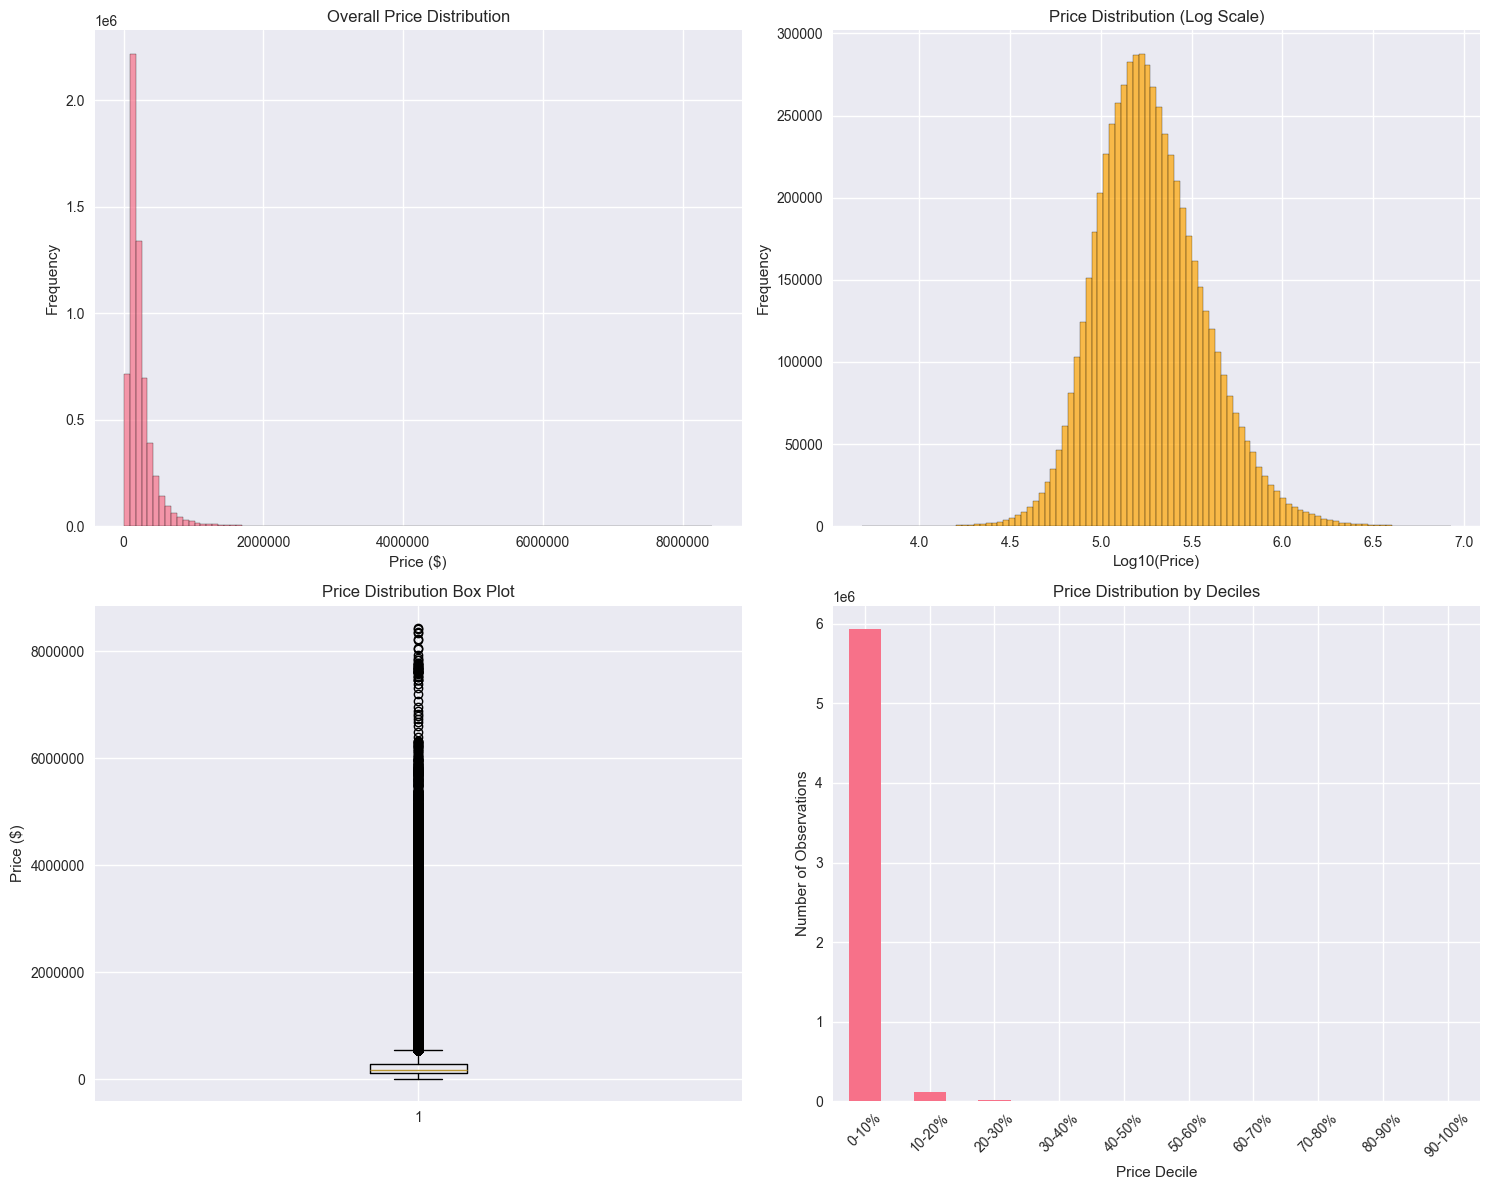

In [16]:
# Price distribution visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Overall price distribution
ax1.hist(all_prices, bins=100, alpha=0.7, edgecolor='black')
ax1.set_title('Overall Price Distribution')
ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Frequency')
ax1.ticklabel_format(style='plain', axis='x')

# Log-scale price distribution
ax2.hist(np.log10(all_prices), bins=100, alpha=0.7, edgecolor='black', color='orange')
ax2.set_title('Price Distribution (Log Scale)')
ax2.set_xlabel('Log10(Price)')
ax2.set_ylabel('Frequency')

# Box plot of prices
ax3.boxplot(all_prices, vert=True)
ax3.set_title('Price Distribution Box Plot')
ax3.set_ylabel('Price ($)')
ax3.ticklabel_format(style='plain', axis='y')

# Price distribution by percentile ranges
price_ranges = pd.cut(all_prices, bins=10, labels=[f'{i*10}-{(i+1)*10}%' for i in range(10)])
price_ranges.value_counts().sort_index().plot(kind='bar', ax=ax4)
ax4.set_title('Price Distribution by Deciles')
ax4.set_xlabel('Price Decile')
ax4.set_ylabel('Number of Observations')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Time Series Analysis

In [17]:
# Time series trends
print("=== TIME SERIES ANALYSIS ===")

# Calculate monthly statistics
monthly_stats = df[date_cols].describe().T
monthly_stats.index = pd.to_datetime(monthly_stats.index)

print(f"\nMonthly price statistics:")
print(f"First month mean: ${monthly_stats.iloc[0]['mean']:,.0f}")
print(f"Last month mean: ${monthly_stats.iloc[-1]['mean']:,.0f}")
print(f"Overall change: {((monthly_stats.iloc[-1]['mean'] / monthly_stats.iloc[0]['mean']) - 1) * 100:.1f}%")

# Find periods with highest/lowest prices
print(f"\nHighest mean prices:")
print(monthly_stats.nlargest(5, 'mean')[['mean', 'count']])

print(f"\nLowest mean prices:")
print(monthly_stats.nsmallest(5, 'mean')[['mean', 'count']])

=== TIME SERIES ANALYSIS ===

Monthly price statistics:
First month mean: $147,467
Last month mean: $362,592
Overall change: 145.9%

Highest mean prices:
                mean    count
2025-02-28 363064.08 26316.00
2025-03-31 362974.75 26316.00
2025-04-30 362591.82 26315.00
2025-01-31 362396.84 26316.00
2024-12-31 361634.80 26316.00

Lowest mean prices:
                mean    count
2000-01-31 147467.37 12894.00
2000-02-29 147601.15 12960.00
2000-03-31 147942.95 12974.00
2000-04-30 148822.07 12993.00
2000-05-31 149756.96 13056.00


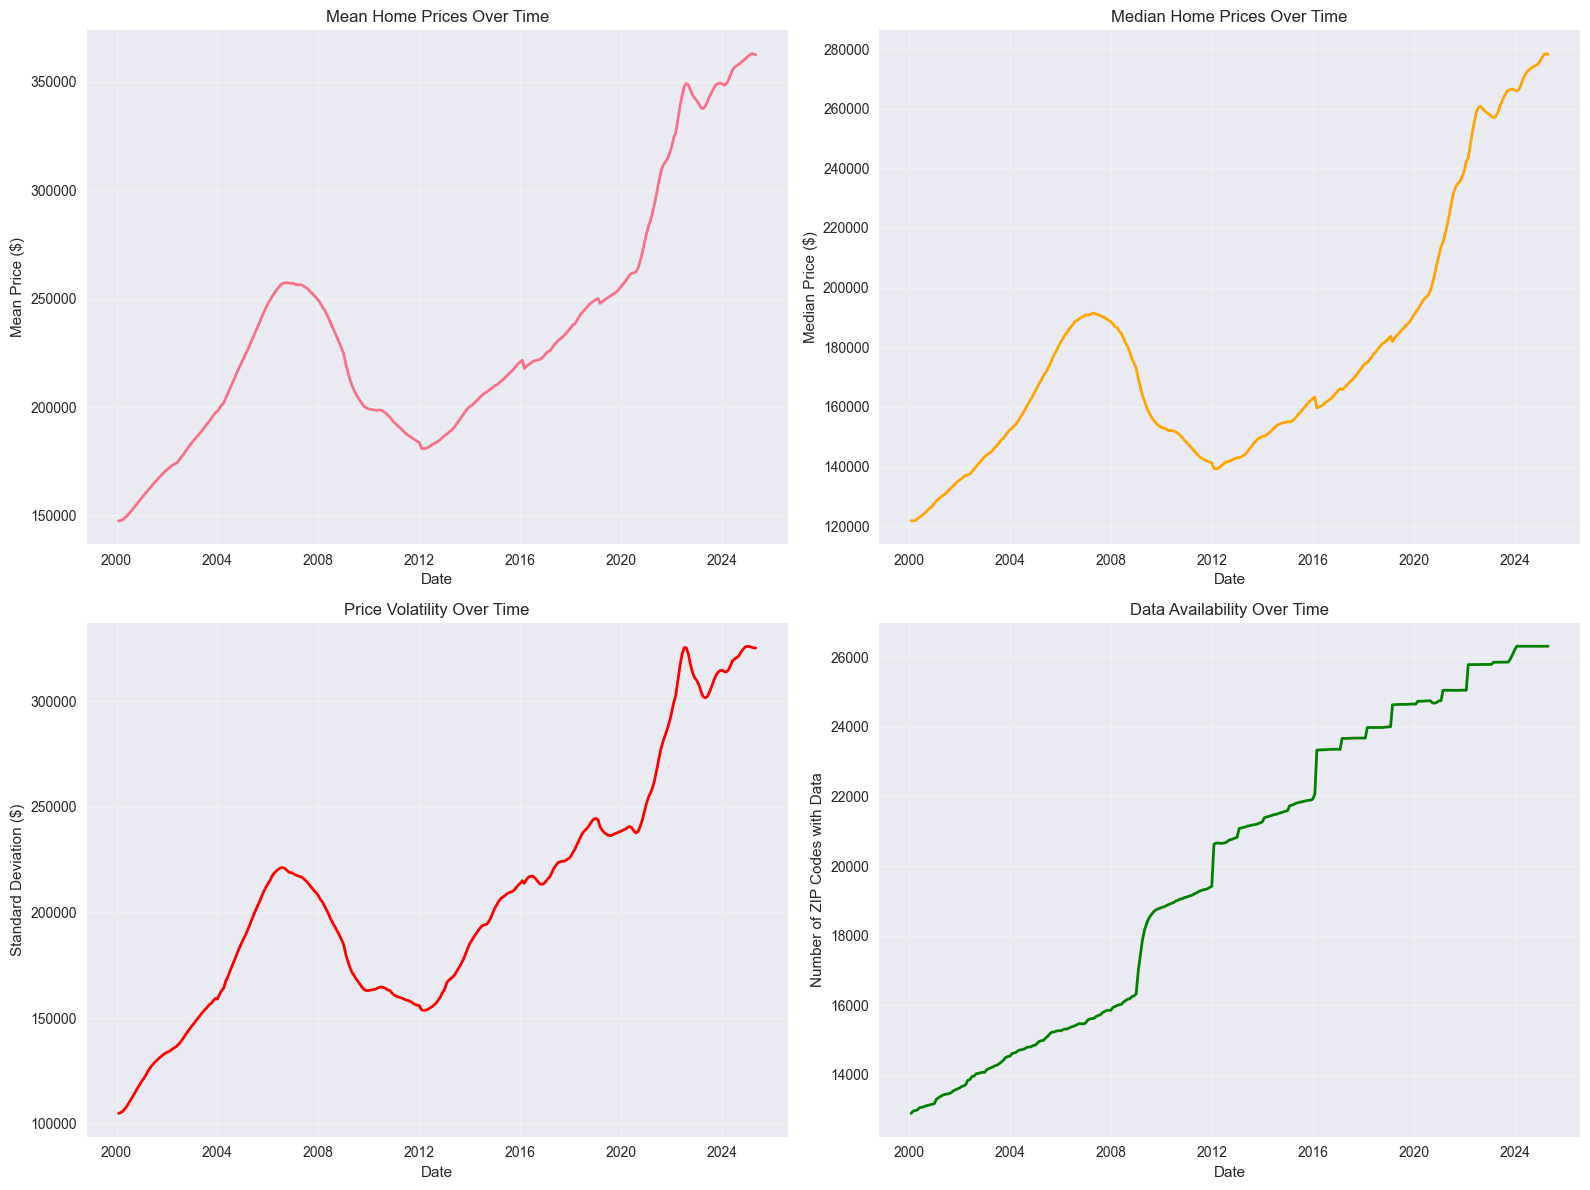

In [18]:
# Visualize time series trends
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Mean prices over time
ax1.plot(monthly_stats.index, monthly_stats['mean'], linewidth=2)
ax1.set_title('Mean Home Prices Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Price ($)')
ax1.grid(True, alpha=0.3)
ax1.ticklabel_format(style='plain', axis='y')

# Median prices over time
ax2.plot(monthly_stats.index, monthly_stats['50%'], linewidth=2, color='orange')
ax2.set_title('Median Home Prices Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Median Price ($)')
ax2.grid(True, alpha=0.3)
ax2.ticklabel_format(style='plain', axis='y')

# Price volatility (standard deviation) over time
ax3.plot(monthly_stats.index, monthly_stats['std'], linewidth=2, color='red')
ax3.set_title('Price Volatility Over Time')
ax3.set_xlabel('Date')
ax3.set_ylabel('Standard Deviation ($)')
ax3.grid(True, alpha=0.3)
ax3.ticklabel_format(style='plain', axis='y')

# Number of observations over time
ax4.plot(monthly_stats.index, monthly_stats['count'], linewidth=2, color='green')
ax4.set_title('Data Availability Over Time')
ax4.set_xlabel('Date')
ax4.set_ylabel('Number of ZIP Codes with Data')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== YEAR-OVER-YEAR GROWTH ANALYSIS ===

Year-over-Year Growth Statistics:
    year  mean_growth  median_growth  std_growth  zip_count
0   2001         7.11           6.36        5.68      12894
1   2002         7.37           6.63        5.63      13302
2   2003         7.50           6.27        6.01      13660
3   2004         8.12           7.07        6.26      14125
4   2005        10.89           9.37        8.07      14540
5   2006        10.99           9.02        9.37      14890
6   2007         4.36           3.78        5.82      15281
7   2008        -1.30          -0.45        6.19      15568
8   2009        -7.54          -5.47        9.03      15909
9   2010        -5.87          -4.80        6.38      16974
10  2011        -3.16          -2.63        4.64      18805
11  2012        -3.93          -3.28        4.79      19111
12  2013         3.48           2.81        6.26      20616
13  2014         6.45           4.82        7.27      21081
14  2015         4.68     

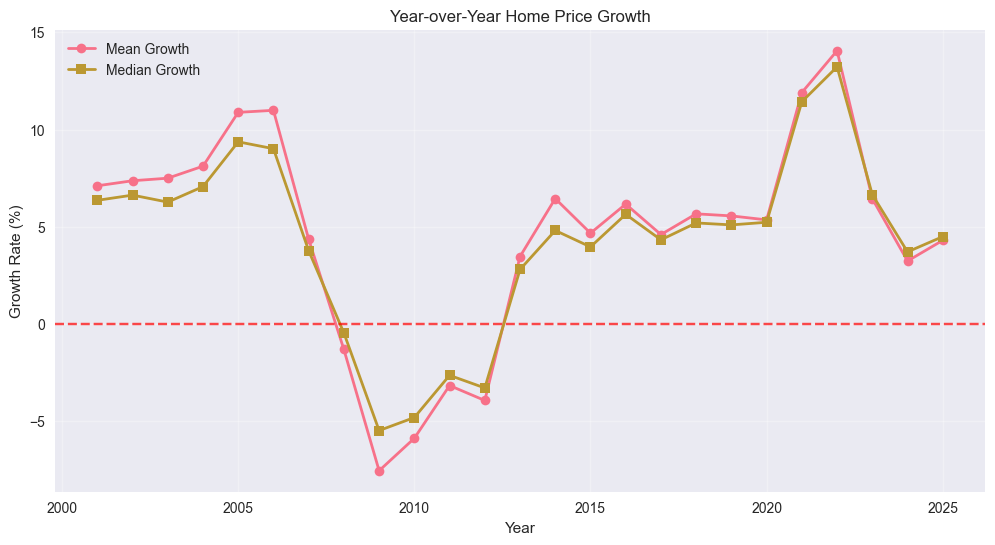

In [19]:
# Year-over-year growth analysis
print("=== YEAR-OVER-YEAR GROWTH ANALYSIS ===")

# Calculate YoY growth for each ZIP code
yoy_growth_data = []

# Get annual data points (every 12 months)
annual_cols = [col for i, col in enumerate(date_cols) if i % 12 == 0]

for i in range(len(annual_cols) - 1):
    current_year = annual_cols[i + 1]
    previous_year = annual_cols[i]
    
    # Calculate growth rates
    current_prices = df[current_year].dropna()
    previous_prices = df[previous_year].dropna()
    
    # Find common ZIP codes
    common_zips = current_prices.index.intersection(previous_prices.index)
    
    if len(common_zips) > 0:
        growth_rates = ((current_prices.loc[common_zips] / previous_prices.loc[common_zips]) - 1) * 100
        
        yoy_growth_data.append({
            'year': pd.to_datetime(current_year).year,
            'mean_growth': growth_rates.mean(),
            'median_growth': growth_rates.median(),
            'std_growth': growth_rates.std(),
            'zip_count': len(common_zips)
        })

yoy_df = pd.DataFrame(yoy_growth_data)

if not yoy_df.empty:
    print("\nYear-over-Year Growth Statistics:")
    print(yoy_df)
    
    # Plot YoY growth
    plt.figure(figsize=(12, 6))
    plt.plot(yoy_df['year'], yoy_df['mean_growth'], marker='o', linewidth=2, label='Mean Growth')
    plt.plot(yoy_df['year'], yoy_df['median_growth'], marker='s', linewidth=2, label='Median Growth')
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    plt.title('Year-over-Year Home Price Growth')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## Sample ZIP Code Deep Dive

=== SAMPLE ZIP CODE ANALYSIS ===

Selected sample ZIP codes:
  ZIP 94027 (Atherton, CA): $7,738,592
  ZIP 1354 (Gill, MA): $354,279
  ZIP 36610 (Prichard, AL): $34,457


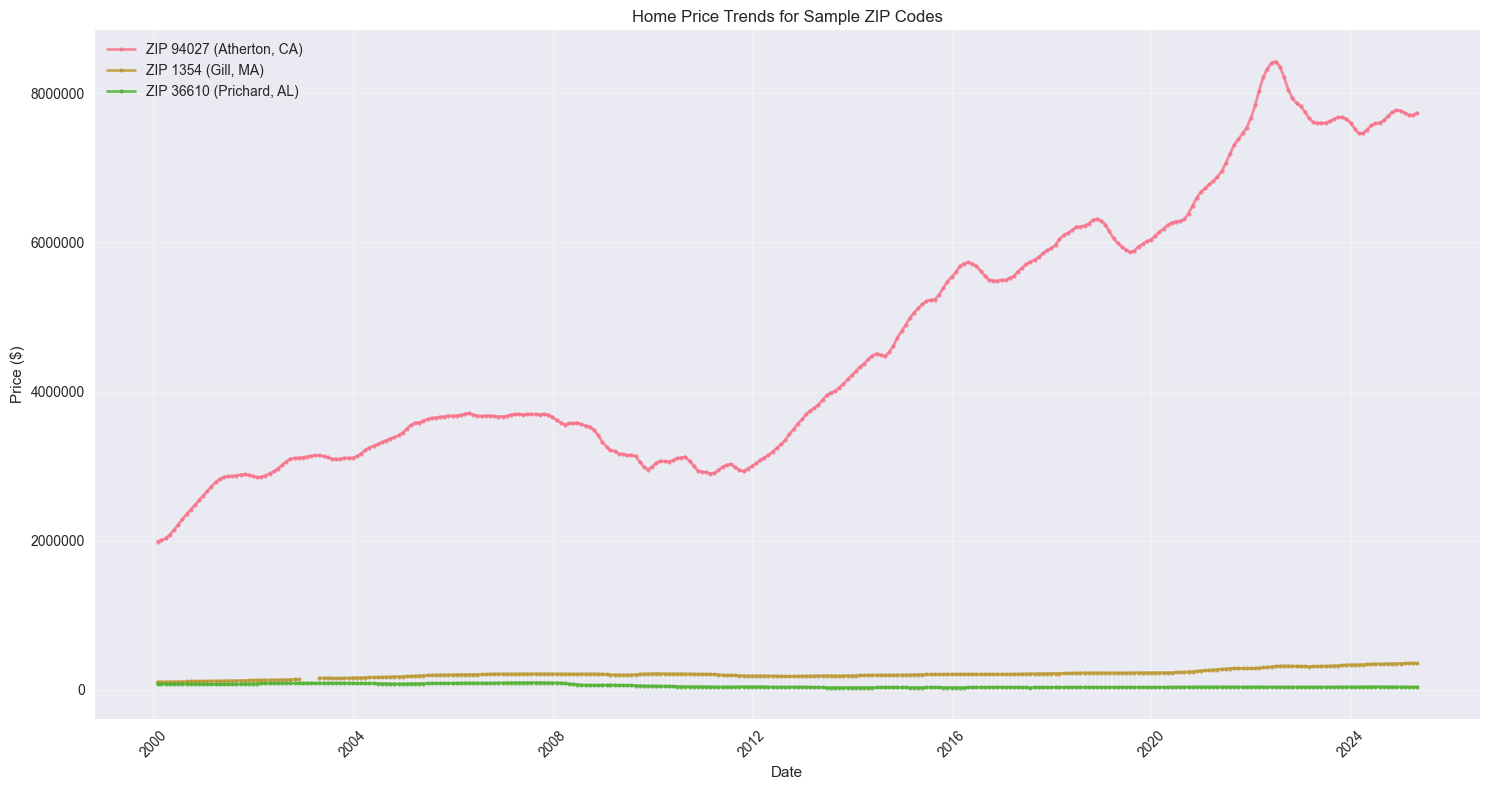

In [20]:
# Select sample ZIP codes for detailed analysis
print("=== SAMPLE ZIP CODE ANALYSIS ===")

# Find ZIP codes with good data coverage
good_zips = df[completeness_pct >= 90].copy()

if len(good_zips) > 0:
    # Select diverse sample: high, medium, low price ranges
    latest_col = date_cols[-1]
    latest_prices = good_zips[latest_col].dropna()
    
    # Get sample ZIP codes from different price ranges
    high_price_zip = latest_prices.idxmax()
    low_price_zip = latest_prices.idxmin()
    median_price_zip = latest_prices.iloc[(latest_prices - latest_prices.median()).abs().argsort()[:1]].index[0]
    
    sample_zips = [high_price_zip, median_price_zip, low_price_zip]
    
    print(f"\nSelected sample ZIP codes:")
    for zip_idx in sample_zips:
        zip_code = df.loc[zip_idx, 'RegionName'] if 'RegionName' in df.columns else zip_idx
        city = df.loc[zip_idx, 'City'] if 'City' in df.columns else 'Unknown'
        state = df.loc[zip_idx, 'State'] if 'State' in df.columns else 'Unknown'
        latest_price = df.loc[zip_idx, latest_col]
        print(f"  ZIP {zip_code} ({city}, {state}): ${latest_price:,.0f}")
    
    # Plot time series for sample ZIP codes
    plt.figure(figsize=(15, 8))
    
    dates = pd.to_datetime(date_cols)
    
    for i, zip_idx in enumerate(sample_zips):
        zip_code = df.loc[zip_idx, 'RegionName'] if 'RegionName' in df.columns else zip_idx
        city = df.loc[zip_idx, 'City'] if 'City' in df.columns else 'Unknown'
        state = df.loc[zip_idx, 'State'] if 'State' in df.columns else 'Unknown'
        
        prices = df.loc[zip_idx, date_cols].values
        
        plt.plot(dates, prices, linewidth=2, marker='o', markersize=3, 
                label=f'ZIP {zip_code} ({city}, {state})', alpha=0.8)
    
    plt.title('Home Price Trends for Sample ZIP Codes')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    print("No ZIP codes found with >90% data coverage")

## Regional Analysis

=== REGIONAL ANALYSIS ===

Top 10 states by mean home price (2025-04-30):
           mean    median  count
State                           
CA    887154.40 717798.94   1543
HI    884449.13 844094.81     78
MA    700252.58 611679.02    485
DC    667345.96 596608.93     22
NJ    649654.63 564064.55    547
WA    586663.91 504789.33    485
CO    558215.58 510965.48    416
RI    551235.15 496862.24     69
UT    533568.99 503204.58    186
CT    518334.50 421332.86    259


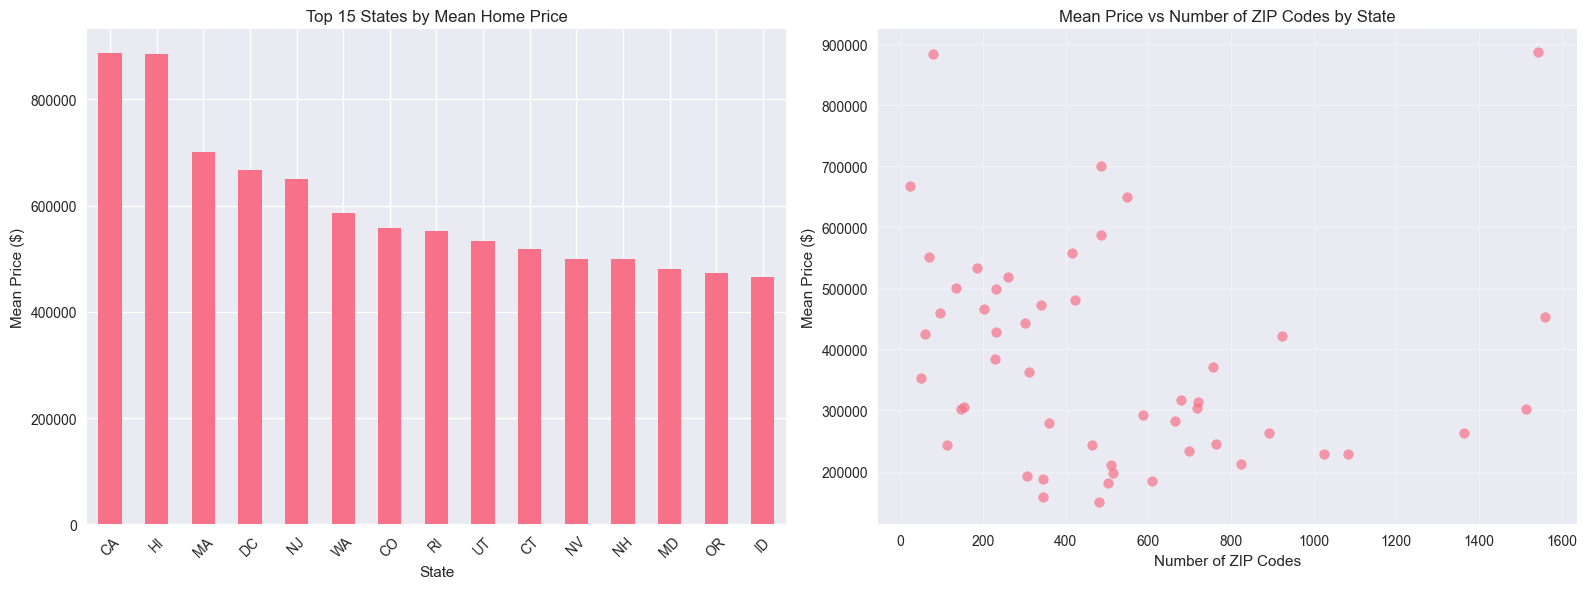

In [21]:
# State-level analysis
if 'State' in df.columns:
    print("=== REGIONAL ANALYSIS ===")
    
    # Calculate latest prices by state
    latest_col = date_cols[-1]
    state_prices = df.groupby('State')[latest_col].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
    
    print(f"\nTop 10 states by mean home price ({latest_col}):")
    print(state_prices.head(10))
    
    # Plot state comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Top 15 states by mean price
    top_states = state_prices.head(15)
    top_states['mean'].plot(kind='bar', ax=ax1)
    ax1.set_title('Top 15 States by Mean Home Price')
    ax1.set_xlabel('State')
    ax1.set_ylabel('Mean Price ($)')
    ax1.tick_params(axis='x', rotation=45)
    ax1.ticklabel_format(style='plain', axis='y')
    
    # Price vs count scatter
    ax2.scatter(state_prices['count'], state_prices['mean'], alpha=0.7)
    ax2.set_title('Mean Price vs Number of ZIP Codes by State')
    ax2.set_xlabel('Number of ZIP Codes')
    ax2.set_ylabel('Mean Price ($)')
    ax2.ticklabel_format(style='plain', axis='y')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## Data Quality Recommendations

In [22]:
# Generate data quality recommendations
print("=== DATA QUALITY RECOMMENDATIONS ===")

# Minimum data requirements for modeling
min_months = 24  # Minimum 2 years of data
min_completeness = 80  # Minimum 80% data completeness

# Filter ZIP codes suitable for modeling
suitable_zips = (completeness >= min_months) & (completeness_pct >= min_completeness)

print(f"\nModeling Readiness Assessment:")
print(f"Total ZIP codes: {len(df):,}")
print(f"ZIP codes with ≥{min_months} months of data: {(completeness >= min_months).sum():,}")
print(f"ZIP codes with ≥{min_completeness}% completeness: {(completeness_pct >= min_completeness).sum():,}")
print(f"ZIP codes suitable for modeling: {suitable_zips.sum():,} ({(suitable_zips.sum()/len(df))*100:.1f}%)")

# Data preprocessing recommendations
print(f"\nData Preprocessing Recommendations:")
print(f"1. Filter to {suitable_zips.sum():,} ZIP codes with sufficient data")
print(f"2. Handle missing values using interpolation or forward-fill")
print(f"3. Consider log transformation for price normalization")
print(f"4. Remove outliers beyond 3 standard deviations")
print(f"5. Standardize time series to monthly frequency")

# Outlier detection
price_z_scores = np.abs((all_prices - np.mean(all_prices)) / np.std(all_prices))
outliers = price_z_scores > 3
print(f"\nOutlier Analysis:")
print(f"Potential outliers (>3 std dev): {outliers.sum():,} ({(outliers.sum()/len(all_prices))*100:.2f}%)")
print(f"Outlier price range: ${all_prices[outliers].min():,.0f} - ${all_prices[outliers].max():,.0f}")

=== DATA QUALITY RECOMMENDATIONS ===

Modeling Readiness Assessment:
Total ZIP codes: 26,316
ZIP codes with ≥24 months of data: 25,858
ZIP codes with ≥80% completeness: 14,977
ZIP codes suitable for modeling: 14,977 (56.9%)

Data Preprocessing Recommendations:
1. Filter to 14,977 ZIP codes with sufficient data
2. Handle missing values using interpolation or forward-fill
3. Consider log transformation for price normalization
4. Remove outliers beyond 3 standard deviations
5. Standardize time series to monthly frequency

Outlier Analysis:
Potential outliers (>3 std dev): 104,078 (1.72%)
Outlier price range: $939,333 - $8,425,650


## Summary and Next Steps

In [23]:
# Final summary
print("=== DATASET SUMMARY ===")
print(f"\n Dataset Overview:")
print(f"   • Total ZIP codes: {len(df):,}")
print(f"   • Time period: {date_cols[0]} to {date_cols[-1]}")
print(f"   • Total months: {len(date_cols)}")
print(f"   • Geographic coverage: {df['State'].nunique() if 'State' in df.columns else 'Unknown'} states")

print(f"\n Price Characteristics:")
print(f"   • Price range: ${np.min(all_prices):,.0f} - ${np.max(all_prices):,.0f}")
print(f"   • Median price: ${np.median(all_prices):,.0f}")
print(f"   • Mean price: ${np.mean(all_prices):,.0f}")

print(f"\n Data Quality:")
print(f"   • Overall completeness: {((len(all_prices))/(len(df)*len(date_cols)))*100:.1f}%")
print(f"   • ZIP codes suitable for modeling: {suitable_zips.sum():,} ({(suitable_zips.sum()/len(df))*100:.1f}%)")
print(f"   • Potential outliers: {outliers.sum():,} ({(outliers.sum()/len(all_prices))*100:.2f}%)")

print(f"\n Modeling Recommendations:")
print(f"   • Focus on {suitable_zips.sum():,} high-quality ZIP codes")
print(f"   • Use {min_months}+ months of historical data")
print(f"   • Implement robust missing value handling")
print(f"   • Consider regional/state-level modeling")
print(f"   • Apply appropriate data transformations")

print(f"\n Next Steps:")
print(f"   1. Implement data preprocessing pipeline")
print(f"   2. Test Chronos-T5-Small model on sample ZIP codes")
print(f"   3. Develop evaluation metrics and validation strategy")
print(f"   4. Build API for real-time predictions")
print(f"   5. Create user interface for easy access")

=== DATASET SUMMARY ===

 Dataset Overview:
   • Total ZIP codes: 26,316
   • Time period: 2000-01-31 to 2025-04-30
   • Total months: 304
   • Geographic coverage: 51 states

 Price Characteristics:
   • Price range: $4,844 - $8,425,650
   • Median price: $178,033
   • Mean price: $243,203

 Data Quality:
   • Overall completeness: 75.8%
   • ZIP codes suitable for modeling: 14,977 (56.9%)
   • Potential outliers: 104,078 (1.72%)

 Modeling Recommendations:
   • Focus on 14,977 high-quality ZIP codes
   • Use 24+ months of historical data
   • Implement robust missing value handling
   • Consider regional/state-level modeling
   • Apply appropriate data transformations

 Next Steps:
   1. Implement data preprocessing pipeline
   2. Test Chronos-T5-Small model on sample ZIP codes
   3. Develop evaluation metrics and validation strategy
   4. Build API for real-time predictions
   5. Create user interface for easy access


In [24]:
# Save key findings for next notebooks
findings = {
    'total_zip_codes': int(len(df)),
    'suitable_zip_codes': int(suitable_zips.sum()),
    'date_columns': date_cols,
    'metadata_columns': metadata_cols,
    'price_stats': {
        'min': float(np.min(all_prices)),
        'max': float(np.max(all_prices)),
        'mean': float(np.mean(all_prices)),
        'median': float(np.median(all_prices)),
        'std': float(np.std(all_prices))
    },
    'data_quality': {
        'overall_completeness': float(((len(all_prices))/(len(df)*len(date_cols)))*100),
        'outlier_percentage': float((int(outliers.sum())/len(all_prices))*100)
    }
}

# Save to processed data directory
import json
os.makedirs('../data/processed', exist_ok=True)
with open('../data/processed/exploration_findings.json', 'w') as f:
    json.dump(findings, f, indent=2)

print("\n Exploration findings saved to '../data/processed/exploration_findings.json'")

TypeError: Object of type int64 is not JSON serializable